In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [ ]:
bias = 200
X, y, coef = make_regression(n_features=1, bias=bias ,random_state=42, coef=True, noise=10)

In [5]:
coef

array(41.74110031)

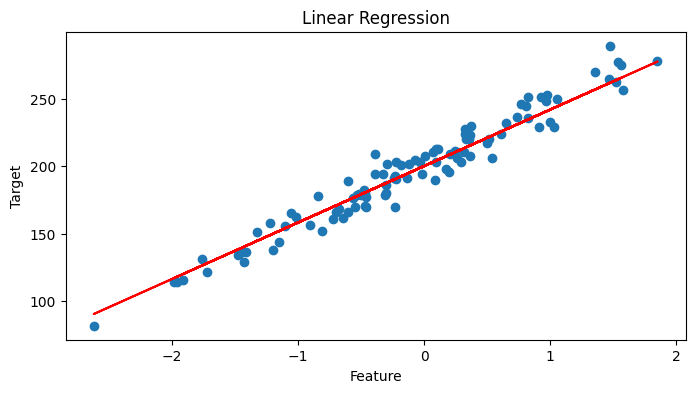

In [8]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.plot(X, coef * X + bias, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()

# Scikit Implementation

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print(f"beta: {model.coef_[0]:.3f}, b: {model.intercept_:.3f}")

beta: 44.437, b: 201.165


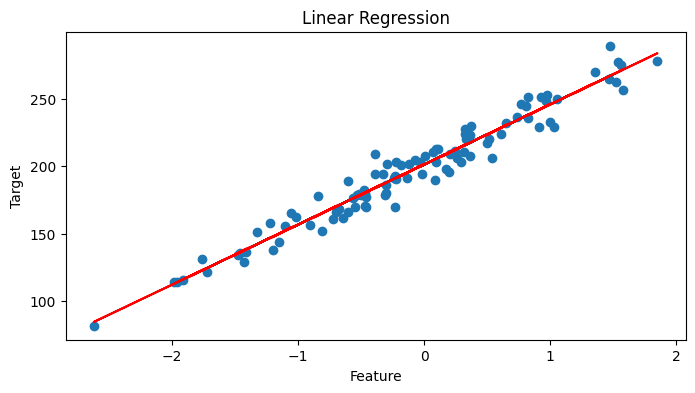

In [37]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.plot(X, model.coef_[0] * X + model.intercept_, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()

In [9]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def fit(self, X, y, tol=1e-4, max_iter=1000, lr=1e-3, verbose=0):
        beta = np.zeros(X.shape[1] + 1)
        X = np.column_stack((np.ones(X.shape[0]), X))
        n = X.shape[0]
        for i in range(max_iter):
            gradient = -2 * np.dot(X.T, y - np.dot(X, beta))/n # [features + 1]
            beta = beta - lr * gradient
            if np.linalg.norm(gradient) < tol:
                break

            if verbose and i%100 == 0:
                print(f"{i} Iteration | Loss: {self.loss(y, np.dot(X, beta))}")

        self.coef_ = beta[1:]
        self.intercept_ = beta[0]

        return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_
    
    def ols(self, X, y):
        X = np.column_stack((np.ones(X.shape[0]), X))
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]

        return self

# Gradient Descent Implementation

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y, verbose=1, lr=5e-3, max_iter=10000)

0 Iteration | Loss: 39521.632501309934
100 Iteration | Loss: 5362.692039709882
200 Iteration | Loss: 786.0883031722277
300 Iteration | Loss: 172.91642259718148
400 Iteration | Loss: 90.76385340569232
500 Iteration | Loss: 79.75707889666987
600 Iteration | Loss: 78.28239482671604
700 Iteration | Loss: 78.0848171345055
800 Iteration | Loss: 78.05834573954395
900 Iteration | Loss: 78.05479911065396
1000 Iteration | Loss: 78.05432393446844
1100 Iteration | Loss: 78.05426027051763
1200 Iteration | Loss: 78.05425174084216
1300 Iteration | Loss: 78.054250598039
1400 Iteration | Loss: 78.05425044492662
1500 Iteration | Loss: 78.05425042441266


In [30]:
beta_scaled = model.coef_[0]
b_scaled = model.intercept_

mu = scaler.mean_[0]
sigma = scaler.scale_[0]

beta = beta_scaled / sigma
b = b_scaled - beta_scaled * mu / sigma

print(f"beta: {beta}, b: {b}")

beta: 44.43715904182901, b: 201.16506574842998


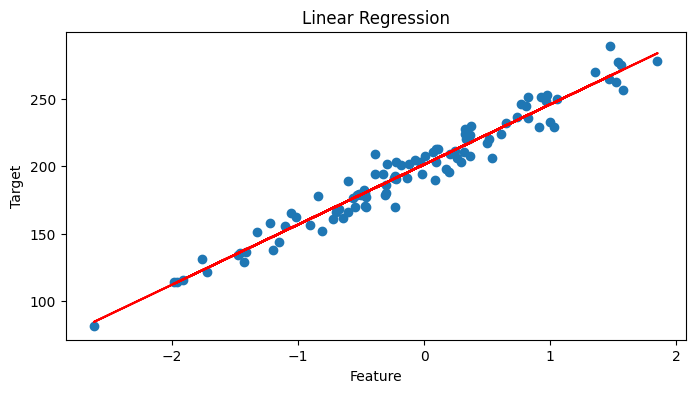

In [31]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.plot(X, beta * X + b, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()

# OLS Implementation

In [34]:
model = LinearRegression()
model.ols(X, y)

print(f"beta: {model.coef_[0]:.3f}, b: {model.intercept_:.3f}")

beta: 44.437, b: 201.165


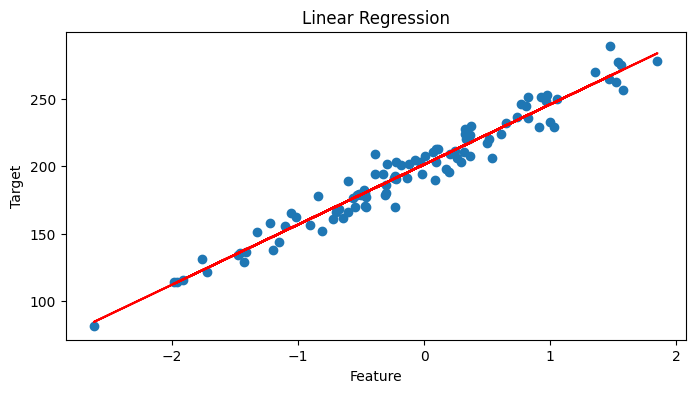

In [35]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.plot(X, model.coef_[0] * X + model.intercept_, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()